In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
import warnings
warnings.filterwarnings("ignore")

In [2]:
# The data has already been sorted into training and test sets
(train_data, train_labels),(test_data, test_labels) = fashion_mnist.load_data()

In [3]:
train_data.shape, train_labels.shape, test_data.shape, test_labels.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [4]:
train_data[0].shape, train_labels[0].shape

((28, 28), ())

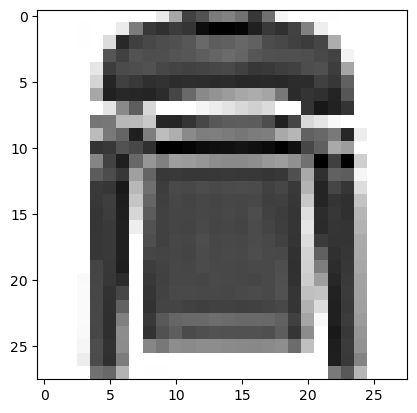

In [5]:
from matplotlib import pyplot as plt
plt.imshow(train_data[5],cmap=plt.cm.binary);

In [6]:
train_labels[5]

2

In [7]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

len(class_names)

10

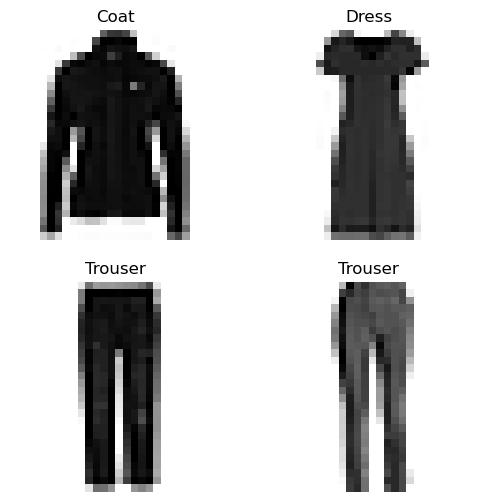

In [8]:
import random
plt.figure(figsize=(6,6))
for i in range(4):
    ax = plt.subplot(2,2,i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

In [9]:
tf.random.set_seed(44)

model_1 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

model_1.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_1 = model_1.fit (train_data,train_labels,epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - accuracy: 0.0959 - loss: 3.4609 
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0975 - loss: 2.3028
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0972 - loss: 2.3027
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0971 - loss: 2.3027
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0971 - loss: 2.3027
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.0969 - loss: 2.3027
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0971 - loss: 2.3027
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0971 - loss: 2.3027
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0971 - loss: 2.3027
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.0971 - loss: 2.3028


In [10]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [11]:
# min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

In [12]:
# Divide train and test images by the maximum value (normalize it)
train_data = train_data / 255.0
test_data = test_data / 255.0

# min and max values of the training data
train_data.min(), train_data.max()

(0.0, 1.0)

In [13]:
tf.random.set_seed(44)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

model_2.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

history_2 = model_2.fit (train_data,train_labels,epochs = 10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3136 - loss: 1.6727
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6373 - loss: 0.9602
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6740 - loss: 0.8389
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6894 - loss: 0.7790
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7031 - loss: 0.7494
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7401 - loss: 0.7268
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7615 - loss: 0.6951
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7717 - loss: 0.6673
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7799 - loss: 0.6458
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7851 - loss: 0.6293


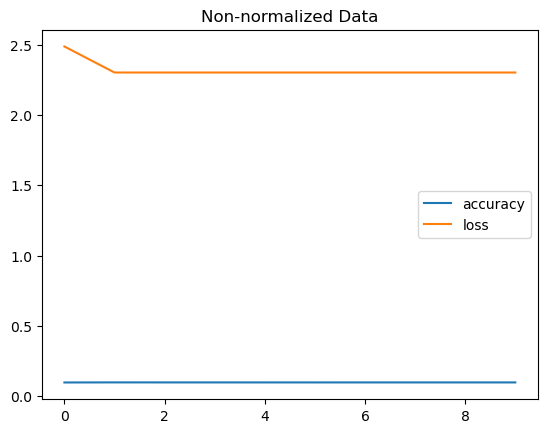

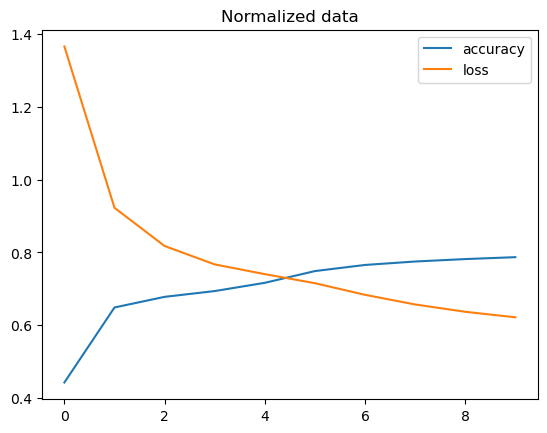

In [14]:
import pandas as pd

# Plot non-normalized data loss curves
pd.DataFrame(history_1.history).plot(title="Non-normalized Data")

# Plot normalized data loss curves
pd.DataFrame(history_2.history).plot(title="Normalized data");

In [15]:
tf.random.set_seed(44)

model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

model_3.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    metrics = ['accuracy']
)

history_3 = model_3.fit (train_data,train_labels,epochs = 15)

Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.4259 - loss: 1.6054
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7137 - loss: 0.8832
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7539 - loss: 0.7279
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7842 - loss: 0.6347
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7978 - loss: 0.5979
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8037 - loss: 0.5787
Epoch 7/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8079 - loss: 0.5660
Epoch 8/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8107 - loss: 0.5565
Epoch 9/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8127 - loss: 0.5492
Epoch 10/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8143 - loss: 0.5428
Epoch 11/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8162 - loss: 0.5375
Epoch 12/15
1875/1875 ━━━━━━━━

In [16]:
# predictions with the most recent model
y_probs = model_3.predict(test_data) # "probs" is short for probabilities

# the first 5 predictions
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 975us/step


array([[8.9680672e-15, 6.5541443e-24, 3.6541711e-16, 2.4649985e-11,
        8.3143027e-07, 1.5347229e-01, 1.9741504e-10, 3.4337237e-02,
        5.2654219e-04, 8.1166321e-01],
       [4.7116122e-05, 3.0321825e-13, 9.6033424e-01, 3.9255342e-11,
        8.9625996e-03, 3.2502160e-17, 3.0655844e-02, 9.1740133e-20,
        9.9468537e-08, 2.1763137e-10],
       [9.4217859e-04, 9.6507382e-01, 2.0628842e-03, 2.1668047e-02,
        5.7845782e-03, 2.4952539e-03, 1.6030183e-03, 2.5788340e-04,
        8.4409636e-05, 2.7971912e-05],
       [9.4217859e-04, 9.6507382e-01, 2.0628842e-03, 2.1668047e-02,
        5.7845782e-03, 2.4952539e-03, 1.6030183e-03, 2.5788340e-04,
        8.4409636e-05, 2.7971912e-05],
       [8.8872343e-02, 3.8203616e-06, 4.4532308e-01, 2.1546474e-03,
        3.3378117e-02, 9.1832639e-09, 4.2887282e-01, 2.0606850e-08,
        1.3921749e-03, 3.0007875e-06]], dtype=float32)

In [17]:
# the higher the number in the prediction probabilities list, the more likely the model believes that is the right class.
# the predicted class number and label for the first example
y_probs[0].argmax(), class_names[y_probs[0].argmax()]

(9, 'Ankle boot')

In [18]:
# Converting all of the predictions from probabilities to labels
y_preds = y_probs.argmax(axis=1)

# the first 10 prediction labels
y_preds[:10]

array([9, 2, 1, 1, 2, 1, 4, 6, 5, 7], dtype=int64)

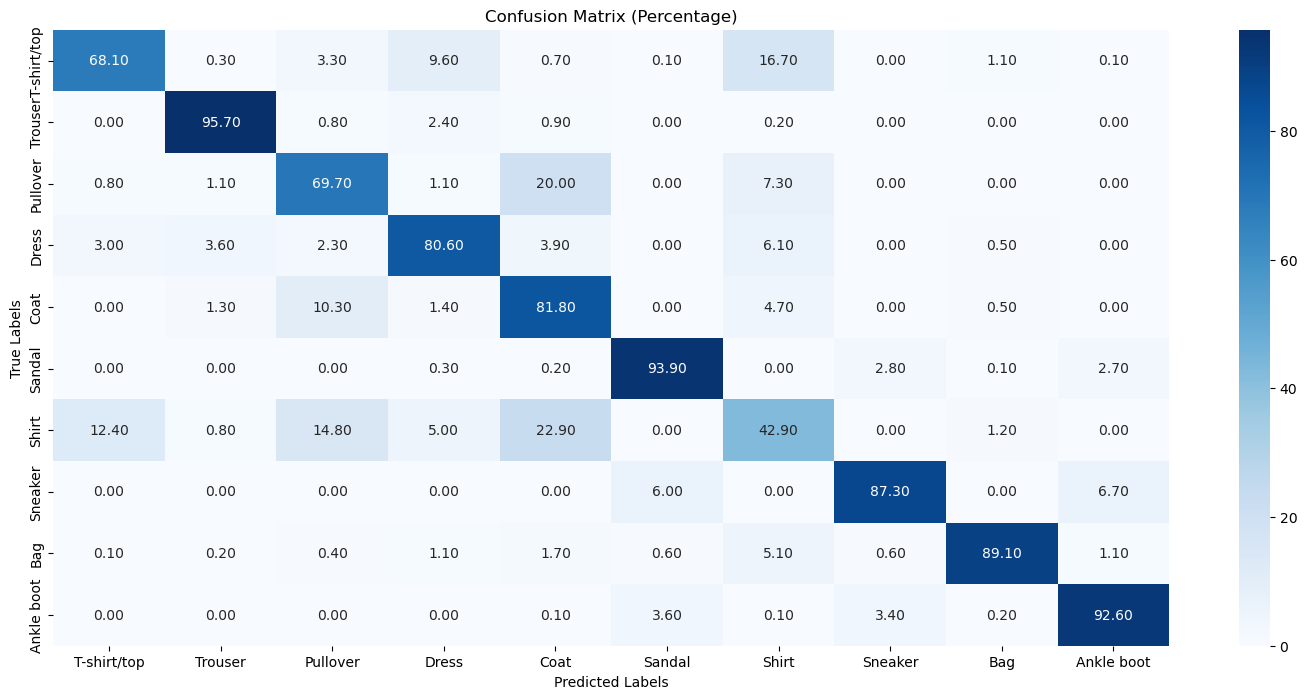

In [27]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=test_labels, y_pred=y_preds)
cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100  

plt.figure(figsize=(18, 8))
sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix (Percentage)")
plt.show()